In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import numpy as np

In [102]:


AA_LIST = ['-', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
MAX_LEN=125
seq = 'MDKKYSIGLDIGTNSVGWAVITDEYKVPSKKFKVLGNTDRHSIKKNLIGALLFDSGETAEATRLKRTARRRYTRRKNRICYLQEIFSNEMAKVDDSFFHRLEESFLVEEDKKHERHPIFG' 
seq_pad = seq[:MAX_LEN] if len(seq) > MAX_LEN else seq + '-' * (MAX_LEN - len(seq))  
test = array(seq_pad).reshape(-1,1)
seq_df = pd.DataFrame([{"pos": i,'aa': x} for i, x in enumerate(seq_pad)]) 
seq_ohe = OneHotEncoder(categories=AA_LIST, handle_unknown = "ignore", sparse_output = False)
final = seq_ohe.fit(test)
"""
encoder = OneHotEncoder(categories=AA_LIST, handle_unknown = "ignore", sparse_output = False)
encoder
test_seq = "".join(AA_LIST)
test_seq
array_test = array(test_seq).reshape(-1 ,len(test_seq))
array_test
final = encoder.fit_transform(array_test)

"""

def define_alphabet(seqtype, ambiguous):
    if seqtype == "dna":
        alphabet = "ACGT"
        if ambiguous:
            alphabet += "NVHDBMRWSYK"
    elif seqtype == "rna":
        alphabet = "ACGU"
        if ambiguous:
            alphabet += "NVHDBMRWSYK"
    elif seqtype == "protein":
        alphabet = "ACDEFGHIKLMNPQRSTVWY"
        if ambiguous:
            alphabet += "XBZJ"
    return alphabet


def seq2onehot(seq, seqtype, ambiguous):
    # This can be more efficient no?
    alphabet = define_alphabet(seqtype, ambiguous)
    onehot = np.zeros([len(seq), len(seq[0]), len(alphabet)])
    for i, s in enumerate(seq):
        s_list = list(alphabet + s)
        alphabet_categorical = np.unique(s_list, return_inverse=True)[1]
        alphabet_categorical = np.expand_dims(alphabet_categorical, 0)
        oh = np.eye(len(alphabet), dtype=np.uint8)[alphabet_categorical]
        oh = oh[:, len(alphabet):]
        onehot[i] = oh
    return onehot

onehot = seq2onehot("AAACHIKL", seqtype = "protein", ambiguous = True)
#print(onehot.shape)
#onehot

ValueError: Expected 2D array, got scalar array instead:
array=MDKKYSIGLDIGTNSVGWAVITDEYKVPSKKFKVLGNTDRHSIKKNLIGALLFDSGETAEATRLKRTARRRYTRRKNRICYLQEIFSNEMAKVDDSFFHRLEESFLVEEDKKHERHPIFG-----.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
def onehote(sequence):
  seq_array = array(list(sequence)) 
  #integer encode the sequence
  label_encoder = LabelEncoder()
  integer_encoded_seq = label_encoder.fit_transform(seq_array) 
  #one hot the sequence
  onehot_encoder = OneHotEncoder()
  #reshape because that's what OneHotEncoder likes
  integer_encoded_seq = integer_encoded_seq.reshape(len(integer_encoded_seq), 1)
  onehot_encoded_seq = onehot_encoder.fit_transform(integer_encoded_seq)
  return onehot_encoded_seq
dna='MAWXDDPWWASSS'
print("DNA\n",list(dna))
print("encoded DNA \n",onehote(dna))

DNA
 ['M', 'A', 'W', 'X', 'D', 'D', 'P', 'W', 'W', 'A', 'S', 'S', 'S']
encoded DNA 
   (0, 2)	1.0
  (1, 0)	1.0
  (2, 5)	1.0
  (3, 6)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 3)	1.0
  (7, 5)	1.0
  (8, 5)	1.0
  (9, 0)	1.0
  (10, 4)	1.0
  (11, 4)	1.0
  (12, 4)	1.0


In [38]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# define example
data = ['cold', 'cold', 'warm', 'cold', 'hot', 'hot', 'warm', 'cold', 'warm', 'hot']
values = array(data)
print(values)
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print(integer_encoded)
# binary encode
onehot_encoder = OneHotEncoder(sparse_output = False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)
# invert first example
inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

['cold' 'cold' 'warm' 'cold' 'hot' 'hot' 'warm' 'cold' 'warm' 'hot']
[0 0 2 0 1 1 2 0 2 1]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]
['cold']


In [81]:
"""
mportantly, your input feature matrix is of shape (N_sequences, N_residue, 21) (or (N_sequences, N_residue, 21 + MAX_LEN)) which is not compatible with scikit-learn which wants (N_record, N_features) matrices; so you'll need to reshape that into (N_sequences, N_residue x 21). Neural networks on the other hand will easily handle (., N_residue, 21) inputs; indeed this is one of the input features (but far from the only input feature) for many protein-oriented network architectures, including AlphaFold.
"""

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = [[0, 'a'], [0, 'b'], [1, 'a'], [2, 'b']]

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

X = ct.fit_transform(X)

In [86]:
seq_df

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

X = ct.fit_transform(seq_df["pos"])

IndexError: tuple index out of range

In [256]:
AA_LIST = ['-', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
#Generate onehot encoded
n = len(AA_LIST)

def protein_onehot(alphabet, mask = None):
    #Create identity matrix according
    onehot_identity = np.eye(N = len(alphabet))
    if mask:
        idx = alphabet.index(mask)
        for i, elem in enumerate(onehot_identity[idx]):
            if elem == 1:
                onehot_identity[idx][i] = 0
    encode_lookup = {}
    for i, item in enumerate(alphabet):
        encode_lookup[item] = list(onehot_identity[i])
    
    return encode_lookup

table = protein_onehot(alphabet = AA_LIST, mask = "-")
def ohe_by_seq(seq, encoder = table):
    seq = seq.upper()
    encoded_seq = np.zeros(shape = (len(seq), len(encoder)))
    for i, item in enumerate(seq):
        if item in encoder.keys():
            encoded_seq[i] = encoder[item]
        else:
            encoded_seq[i] = encoder["-"] # replace with mask

    return encoded_seq.astype("int8")

def pad_seq(seq):
    mask = '-'
    max_len = 500
    pad_seqs = seq[:max_len] if len(seq) > max_len else seq + mask * (max_len - len(seq))

    return pad_seqs

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [181]:
def pad_sequence(seq, max_len = 500):
    assert type(seq) == str
    pad_seq = seq[:max_len] if len(seq) > max_len else seq + '-' * (max_len - len(seq))

    return pad_seq

test = "AAABBBCCCDD"
pad_test = pad_sequence(test)
print(pad_test)
print(len(pad_test))

AAABBBCCCDD---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
500


In [154]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [149]:
dataset = pd.read_table("C:/Users/Fabian/Desktop/TFs.tsv", index_col = 0)
dataset
#X_train, X_test, y_train, y_test = 

,header,seqs,lens,marker
0,sp|Q6GZX4|001R_FRG3G Putative transcription fa...,MAFSAEDVLKEYDRRRRMEALLLSLYYPNDRKLLDYKEWSPPRVQV...,256,TF
1,sp|Q6GZX3|002L_FRG3G Uncharacterized protein 0...,MSIIGATRLQNDKSDTYSAGPCYAGGCSAFTPRGTCGKDWDLGEQT...,320,NoTF
2,sp|Q197F8|002R_IIV3 Uncharacterized protein 00...,MASNTVSAQGGSNRPVRDFSNIQDVAQFLLFDPIWNEQPGSIVPWK...,458,NoTF
3,sp|Q197F7|003L_IIV3 Uncharacterized protein 00...,MYQAINPCPQSWYGSPQLEREIVCKMSGAPHYPNYYPVHPNALGGA...,156,NoTF
4,sp|Q6GZX2|003R_FRG3G Uncharacterized protein 3...,MARPLLGKTSSVRRRLESLSACSIFFFLRKFCQKMASLVFLNSPVY...,438,NoTF
...,...,...,...,...
571604,sp|Q6UY62|Z_SABVB RING finger protein Z OS=Sab...,MGNSKSKSKLSANQYEQQTVNSTKQVAILKRQAEPSLYGRHNCRCC...,100,NoTF
571605,sp|P08105|Z_SHEEP Putative uncharacterized pro...,MSSSLEITSFYSFIWTPHIGPLLFGIGLWFSMFKEPSHFCPCQHPH...,79,NoTF
571606,sp|Q88470|Z_TACVF RING finger protein Z OS=Tac...,MGNCNRTQKPSSSSNNLEKPPQAAEFRRTAEPSLYGRYNCKCCWFA...,95,NoTF
571607,sp|A9JR22|Z_TAMVU RING finger protein Z OS=Tam...,MGLRYSKEVRDRHGDKDPEGRIPITQTMPQTLYGRYNCKSCWFANK...,95,NoTF


In [215]:
features = dataset[["seqs", "marker"]]
features["seqs"] = features["seqs"].apply(pad_sequence)

C:\Users\Fabian\AppData\Local\Temp\ipykernel_18052\2310643850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["seqs"] = features["seqs"].apply(pad_sequence)


In [371]:
X_train, X_test, y_train, y_test = train_test_split(feats["enc"], feats["marker"], test_size = 0.8)

In [321]:
print(X_train.shape, X_train)
X_train = X_train[0:3]
X_train
y_train = y_train[0:3]

(5716,) 6463     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
23256    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
18976    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
18511    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
21734    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...
                               ...                        
22435    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
24932    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
25745    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
22715    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
1584     [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
Name: enc, Length: 5716, dtype: object


In [460]:
#encoder = table
n = 10
percent = features.head(int(len(features)*(n/100)))
encoded_seqs = percent["seqs"].apply(ohe_by_seq)

In [461]:
percent["enc"] = encoded_seqs

C:\Users\Fabian\AppData\Local\Temp\ipykernel_18052\3748945313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  percent["enc"] = encoded_seqs


In [300]:
test_enc = list(feats["enc"])
test_enc_np = np.asarray(test_enc)
test_marker = list(feats["marker"])

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [462]:
feats = percent[["enc", "marker"]]

In [268]:
convert_feats_to_np = feats["enc"].to_numpy(dtype = "float32")

ValueError: setting an array element with a sequence.

In [325]:
X_train
y_train

6463     NoTF
23256    NoTF
18976    NoTF
Name: marker, dtype: object

In [322]:
rf = RandomForestClassifier()

In [323]:
rf.fit(X_train, y_train)

ValueError: setting an array element with a sequence.

In [199]:
len(X_train.iloc[1])

500

In [211]:
for elem in X_train:
    if len(elem) != 500:
        print("here")

In [206]:
test = X_train.iloc[1]

In [306]:
something = np.asarray(X_train, dtype = "int32")

ValueError: setting an array element with a sequence.

In [308]:
X_train.shape

(1143,)

In [237]:
X_train_2 = X_train.astype("int32", copy = True)

ValueError: setting an array element with a sequence.

In [243]:
hashSet = set()
for elem in X_train:
    for arr in elem:
        hashSet.add(len(arr))

hashSet
        

{21}

In [244]:
Set = set()
for elem in X_train:
    Set.add(len(elem))
Set
    

{500}

In [326]:
arr = np.asarray(values, dtype=dtype)

NameError: name 'dtype' is not defined

In [329]:
test = X_train.iloc[0]
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [337]:
for arr in X_train:
    try:
        test = np.asarray(arr, dtype = "int32")
    except:
        print(arr)

In [334]:
test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [464]:
X_train, X_test, y_train, y_test = train_test_split(feats["enc"], feats["marker"], train_size = 0.8)

In [362]:
new_list = []
for arr in feats["enc"]:
    try:
        new_list.append(arr.flatten())
    except:
        print("didnt work")
new_test_split = np.asarray(new_list).T
df = pd.DataFrame(new_test_split)
X_train, X_test, y_train, y_test = train_test_split(df[[0,1]], df[2], test_size = 0.2)

In [414]:
rf = RandomForestClassifier()

In [415]:
rf.fit(n, y_train.iloc[0:3])


RandomForestClassifier()

In [411]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4,

                           n_informative=2, n_redundant=0,

                           random_state=0, shuffle=False)
print(X)
test = np.asarray(X_train)
#new = test.reshape((-1,21))
print(X_train.shape)
print(X_train.iloc[0].shape)
print(X.shape)
print(y)

t = X_train.iloc[0:3]
s = []
for arr in t:
    curr = arr.flatten()
    s.append(curr)


n = np.asarray(s)
print(np.asarray(n).shape)
#clf = RandomForestClassifier(max_depth=2, random_state=0)

#clf.fit(X, y)

#print(clf.predict([[0, 0, 0, 0]]))

[[-1.66853167 -1.29901346  0.2746472  -0.60362044]
 [-2.9728827  -1.08878294  0.70885958  0.42281857]
 [-0.59614125 -1.37007001 -3.11685659  0.64445203]
 ...
 [ 0.91711204  1.10596645  0.86766522 -2.25625012]
 [ 0.10027664  1.45875846 -0.44360274 -0.67002328]
 [ 1.0415229  -0.01987143  0.15216419 -1.9405334 ]]
(5716,)
(500, 21)
(1000, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1

In [419]:
#print(rf.predict(X_train.iloc[4]))
#Think about reshaping back to (500,21)
feats["enc"]
feats["marker"]

ValueError: X has 21 features, but RandomForestClassifier is expecting 10500 features as input.

In [436]:
# Now properly format data 
X_train, X_test, y_train, y_test = train_test_split(feats["enc"], feats["marker"], train_size = 0.8)

In [465]:
# Right now just for train data
new_train = []
for arr in X_train:
    new_train.append(arr.flatten())

In [466]:
X_train = np.asarray(new_train)

In [467]:
print(X_train.shape)

(45728, 10500)


In [468]:
rf = RandomForestClassifier(verbose = 2)

In [469]:
rf.fit(X_train, y_train)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  1.7min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestClassifier(verbose=2)

In [470]:
new_test = []
for array in X_test:
    new_test.append(array.flatten())

X_test = np.asarray(new_test)

In [471]:
print(X_test.shape)

(11432, 10500)


In [472]:
from sklearn.metrics import PrecisionRecallDisplay, confusion_matrix

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


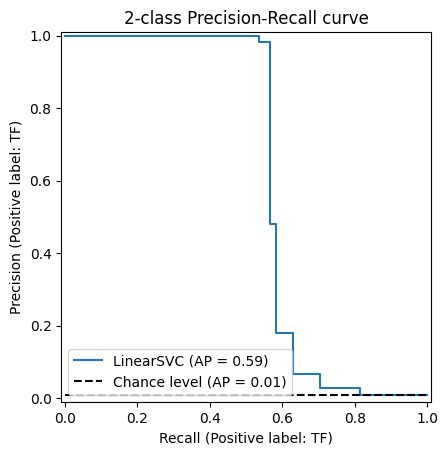

In [473]:
display = PrecisionRecallDisplay.from_estimator(
    rf, X_test, y_test, name="LinearSVC", plot_chance_level=True
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [474]:
# For confusion matrix
Y_pred = rf.predict(X_test)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.3s


In [475]:
Y_pred

array(['NoTF', 'NoTF', 'NoTF', ..., 'NoTF', 'NoTF', 'NoTF'], dtype=object)

In [452]:
for label in array:
    if label.any() == "TF":
        print("here")

In [476]:
from sklearn.metrics import ConfusionMatrixDisplay

In [1]:
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, display = True)

NameError: name 'ConfusionMatrixDisplay' is not defined

In [455]:
matrix = confusion_matrix(y_test, Y_pred)

In [456]:
matrix

array([[5664,    0],
       [   6,   46]], dtype=int64)

In [457]:
import seaborn as sn

ModuleNotFoundError: No module named 'seaborn'

In [478]:
feats[feats["marker"] == "TF"]

,enc,marker
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF
117,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF
3419,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF
3420,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF
3421,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF
...,...,...
55711,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF
55712,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF
56238,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF
56240,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",TF


In [ ]:
class RF_module(RandomForestClassifier):

    def __init__(self):
        super().__init__(self)

    @classmethod
    def split_and_process_ohe(self, data):
        X_train, X_test, y_train, y_test = train_test_split(data["feats"], 